# Multi-Class Prediction of Obesity Risk

#### The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Description of Dataset:

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.


The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

NObesity values are:

•Underweight Less than 18.5

•Normal 18.5 to 24.9

•Overweight 25.0 to 29.9

•Obesity I 30.0 to 34.9

•Obesity II 35.0 to 39.9

•Obesity III Higher than 40

### Data Pre-processing:

In [3]:
#Understanding structure of data:
print(df.shape)
print(df.info())

(20758, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                 

In [4]:
#Checking for duplicate values:
df.duplicated().sum()

0

In [5]:
#Dropping ID column:
df = df.drop('id',axis=1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### EDA:

In [6]:
#Summarize the Dataset:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMOKE,20758,2,no,20513,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Checking for class imbalance:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

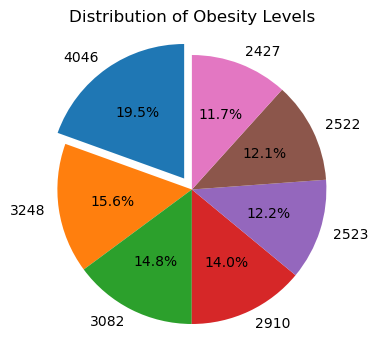

In [8]:
plt.figure(figsize=(4, 4))
plt.pie(df.NObeyesdad.value_counts(), labels=df.NObeyesdad.value_counts(), autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0, 0, 0, 0, 0))
plt.title('Distribution of Obesity Levels')
plt.axis('equal')
plt.show()

#### EDA for categorical features:

In [9]:
#List of categorical variables:
categorical_features = list(df.columns.drop(['Age','Height','Weight','NObeyesdad','TUE','FAF','CH2O','FCVC','NCP']))

Gender
Female    10422
Male      10336
Name: count, dtype: int64 



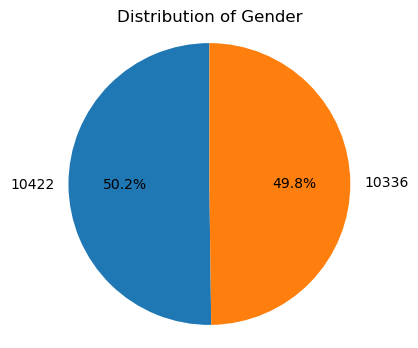

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64 



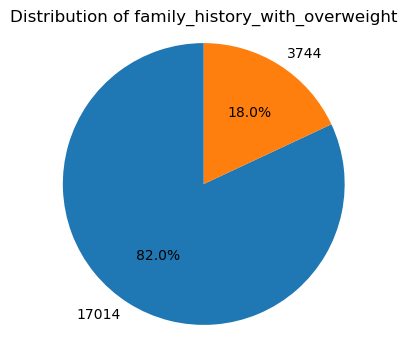

FAVC
yes    18982
no      1776
Name: count, dtype: int64 



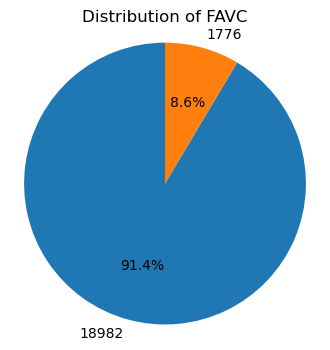

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64 



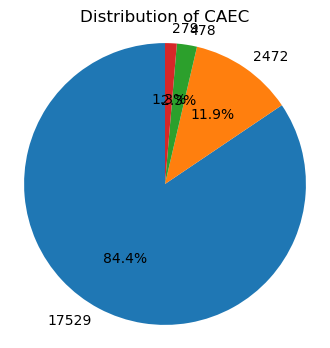

SMOKE
no     20513
yes      245
Name: count, dtype: int64 



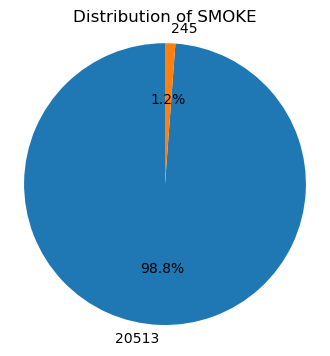

SCC
no     20071
yes      687
Name: count, dtype: int64 



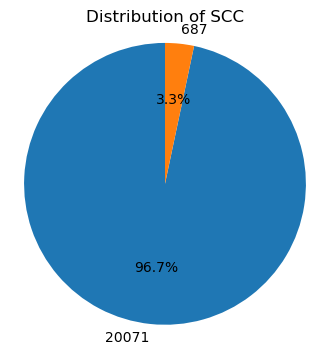

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64 



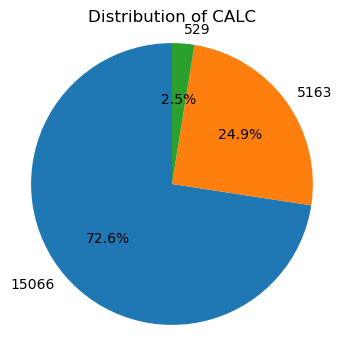

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64 



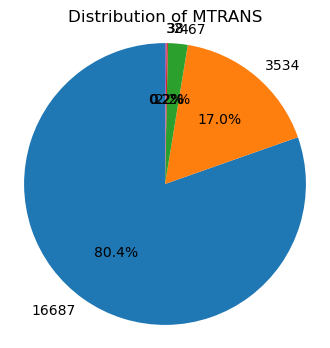

In [10]:
#Checking class imbalance for all categorical features:
for i in categorical_features:
    print(df[i].value_counts(),'\n')
    plt.figure(figsize=(4, 4))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts(), autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {i}')
    plt.axis('equal')
    plt.show()

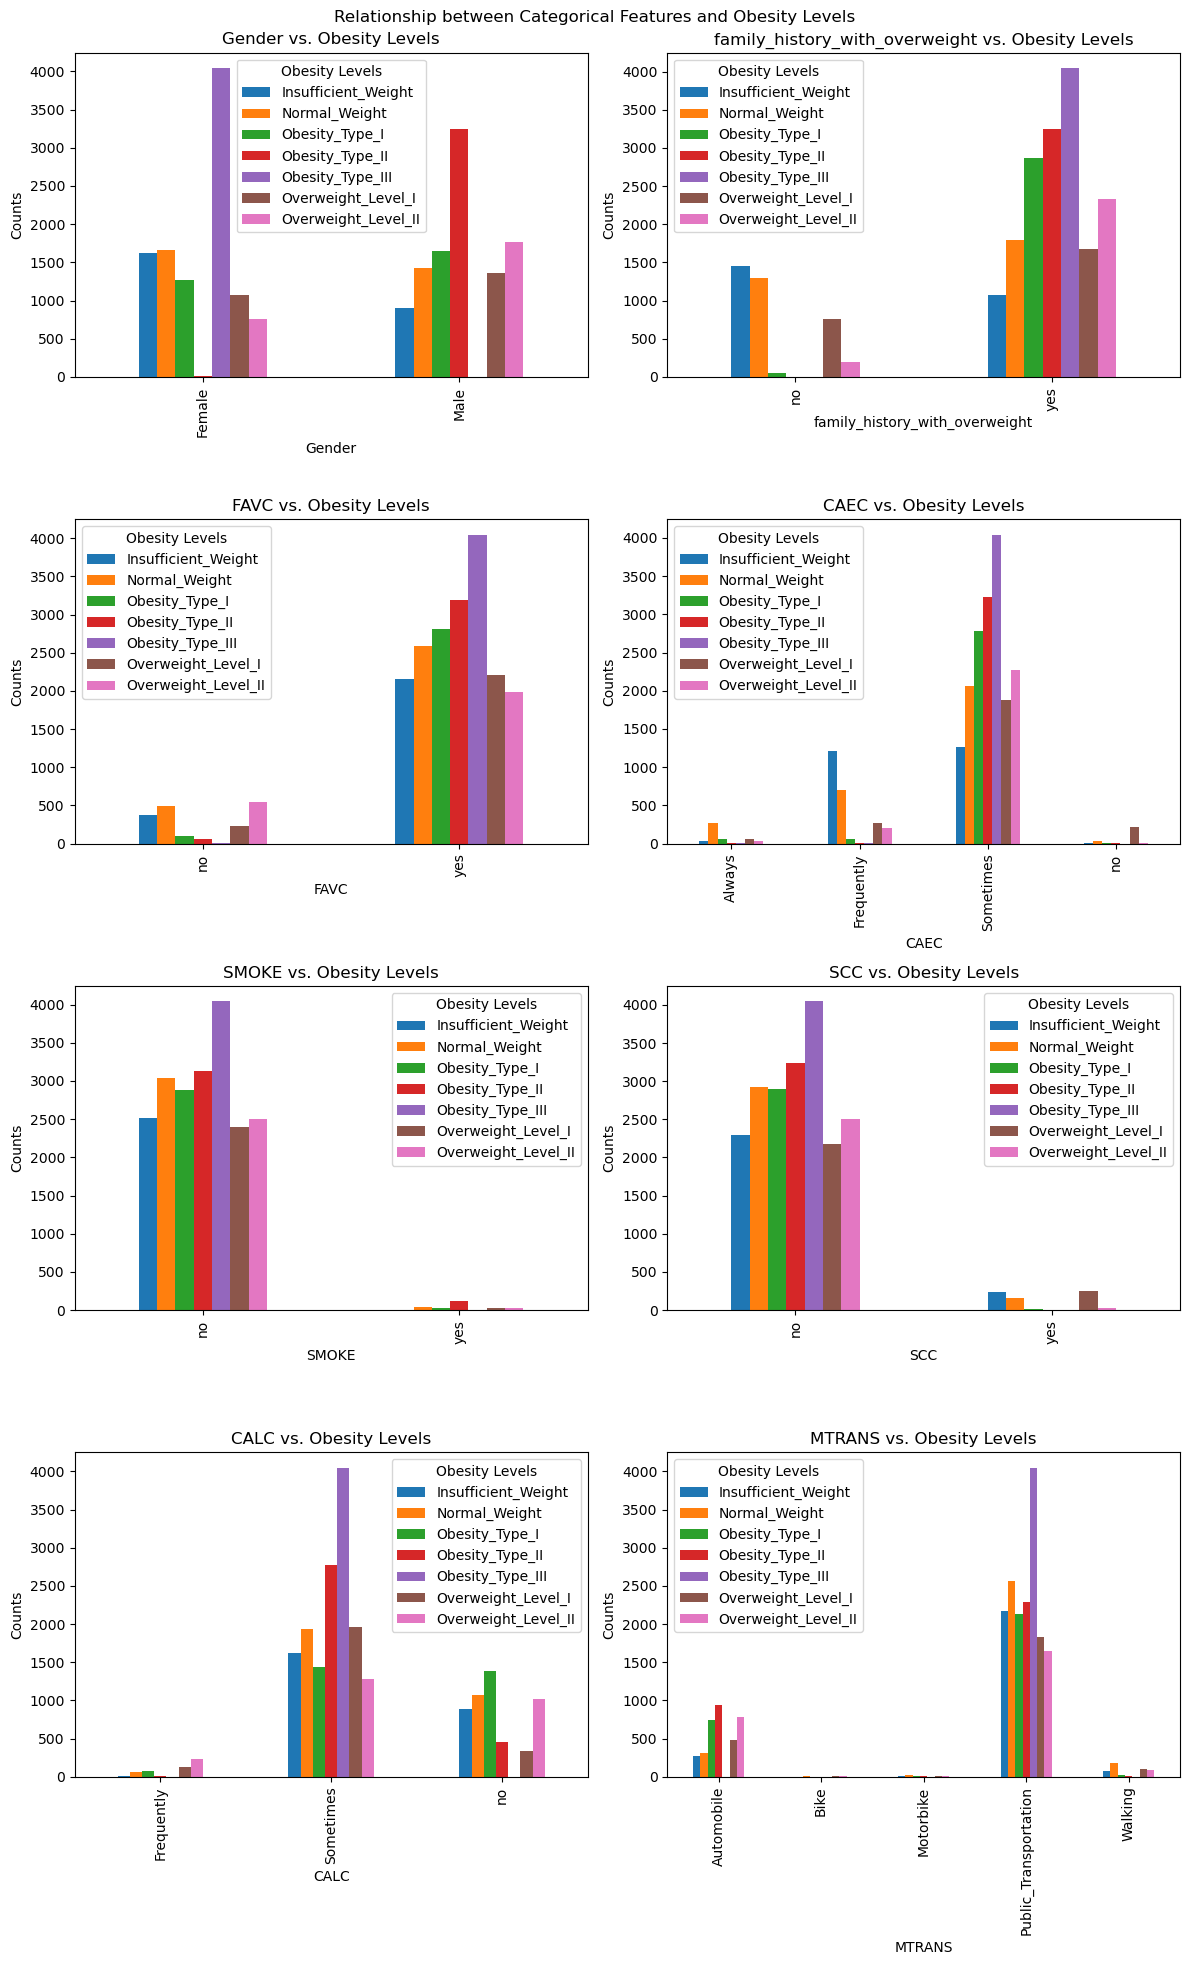

In [11]:
#Checking relationship between categorical features and target variable.

# Create a grid of subplots
nrows, ncols = 4, 2  # You can adjust the number of rows and columns
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 20))
fig.suptitle('Relationship between Categorical Features and Obesity Levels''\n')

# Iterate through categorical features and plot on subplots
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, ncols)
    ctab = pd.crosstab(df[feature], df['NObeyesdad'])
    ctab.plot(kind='bar', ax=axs[row, col], legend=False)
    axs[row, col].set_title(f'{feature} vs. Obesity Levels')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Counts')
    axs[row, col].legend(title='Obesity Levels')
    
plt.tight_layout()
plt.show()


##### Feature Selection:

In [12]:
#Let's identify which features among them is important to target variable using Chi-squared test for independance:
import scipy.stats as stats
# Create an empty list to store significant features
significant_features = []

# Iterate through categorical features
for feature in categorical_features:
    ctab = pd.crosstab(df[feature], df['NObeyesdad'])
    chi2, p_value, dof, expected = stats.chi2_contingency(ctab)
    
    # Check if p-value is less than 0.05 (5% significance level)
    if p_value < 0.05:
        significant_features.append(feature)
        print(f"{feature}: Chi-Square = {chi2:.3f}, p-value = {p_value} (Significant)")
    else:
        print(f"{feature}: Chi-Square = {chi2:.3f}, p-value = {p_value}")

print("\nSignificant features based on Chi-Square Test of Independence:")
print(significant_features)

Gender: Chi-Square = 7953.768, p-value = 0.0 (Significant)
family_history_with_overweight: Chi-Square = 6423.317, p-value = 0.0 (Significant)
FAVC: Chi-Square = 1553.630, p-value = 0.0 (Significant)
CAEC: Chi-Square = 6897.330, p-value = 0.0 (Significant)
SMOKE: Chi-Square = 216.301, p-value = 6.396981747148517e-44 (Significant)
SCC: Chi-Square = 1024.798, p-value = 3.870102954479357e-218 (Significant)
CALC: Chi-Square = 4013.083, p-value = 0.0 (Significant)
MTRANS: Chi-Square = 2349.083, p-value = 0.0 (Significant)

Significant features based on Chi-Square Test of Independence:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [13]:
#List of numerical features:
numerical_features = list(df.columns.drop(categorical_features).drop('NObeyesdad'))
numerical_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [14]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


##### Histogram Plot:

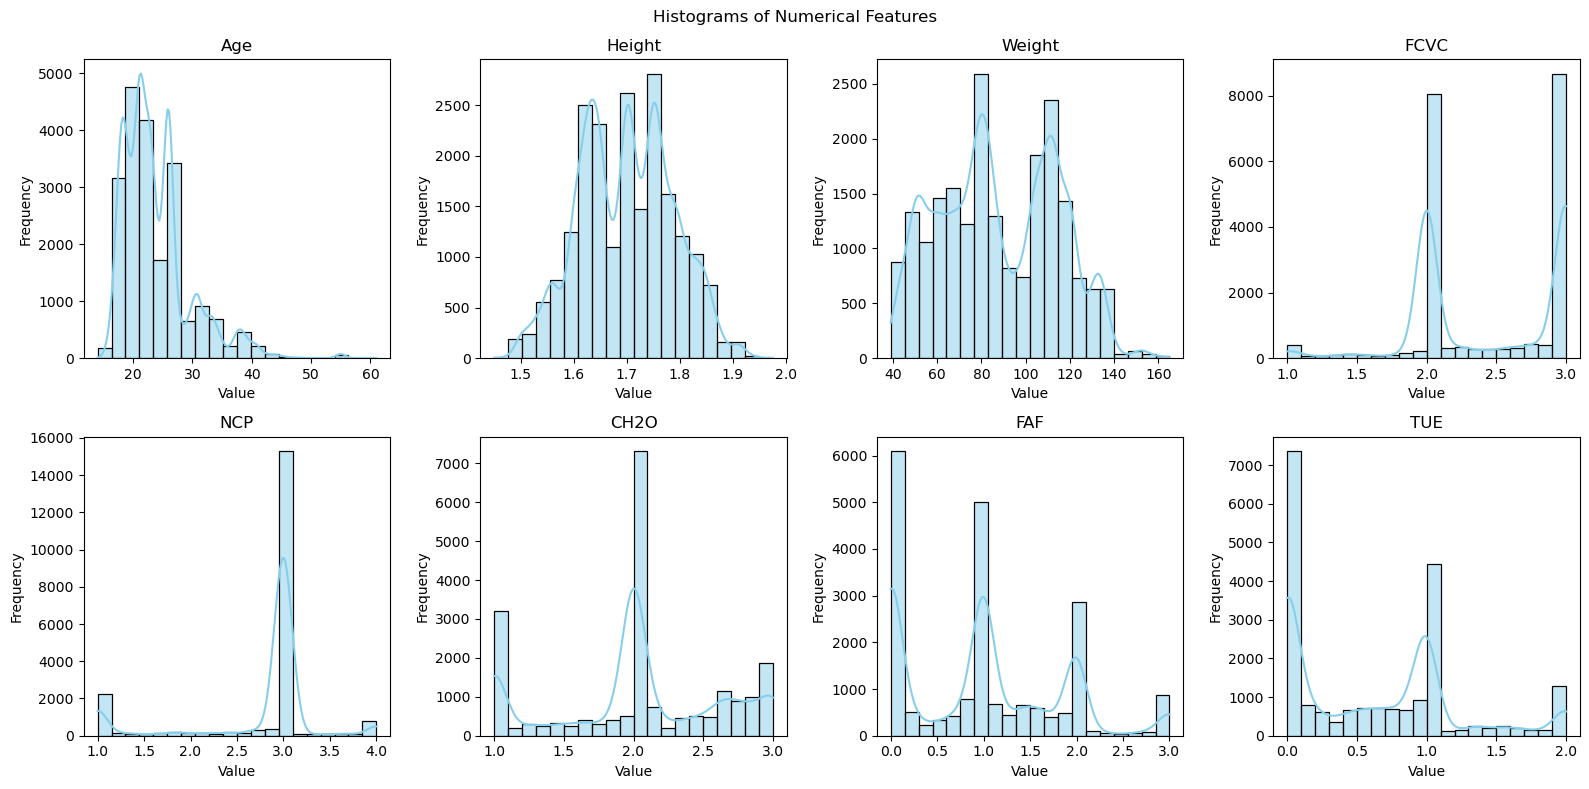

In [15]:
# Create a grid of subplots
nrows, ncols = 2, 4  
fig, axs = plt.subplots(nrows, ncols, figsize=(16, 8))
fig.suptitle('Histograms of Numerical Features')


# Iterate through numerical features and plot histograms
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, ncols)
    sns.histplot(df[feature], bins=20, kde=True, color='skyblue', ax=axs[row, col])
    axs[row, col].set_title(feature)
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Correlation Plot:

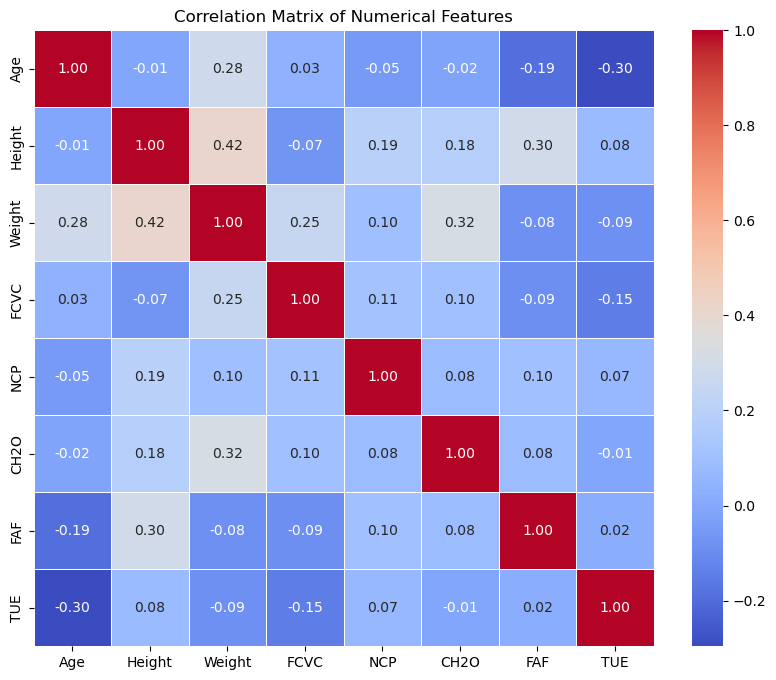

In [16]:
# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##### Box Plot:

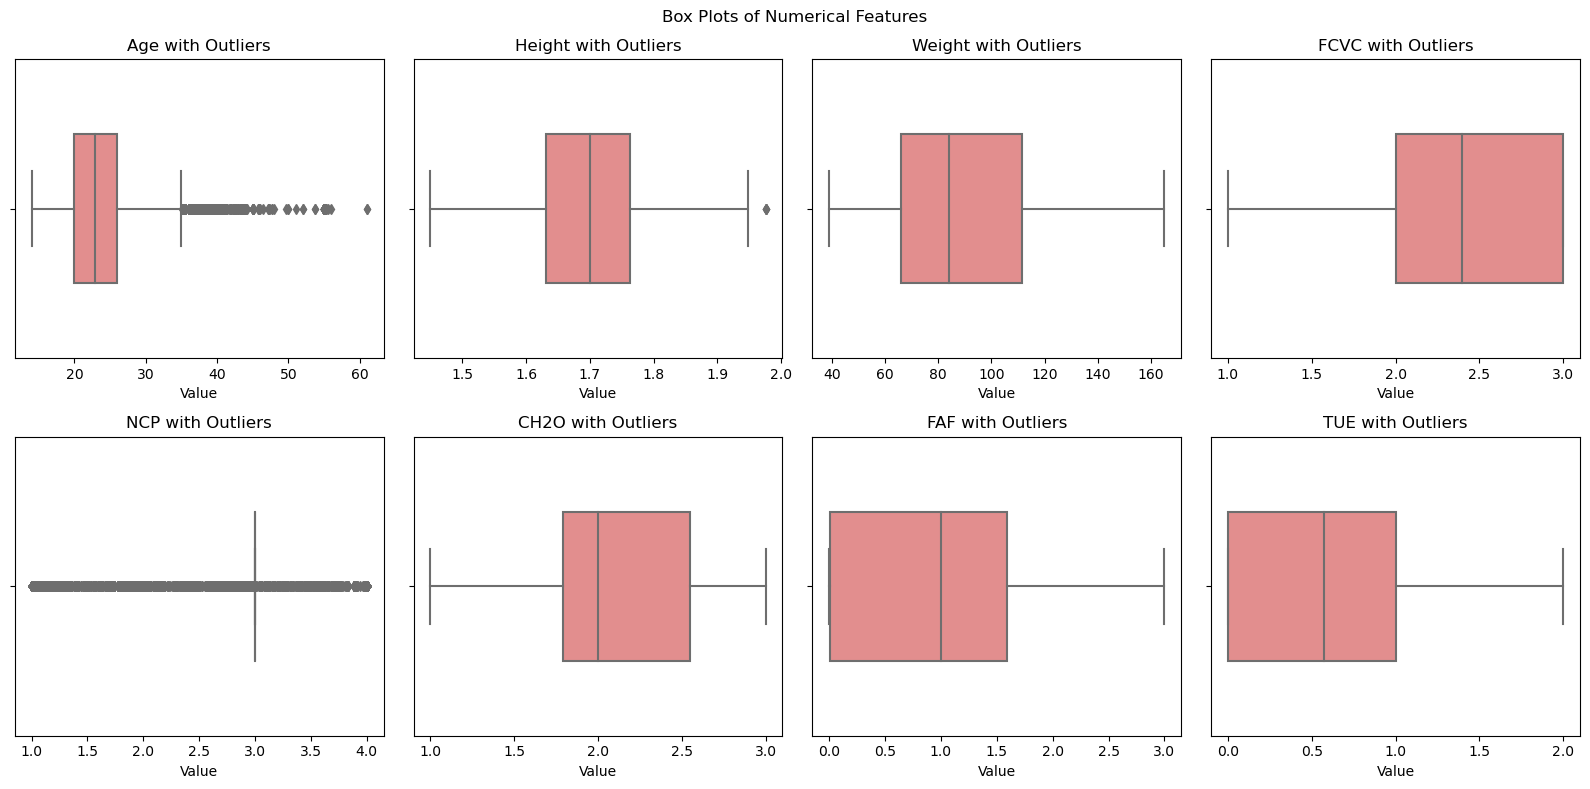

In [17]:
# Create a grid of subplots
nrows, ncols = 2, 4  
fig, axs = plt.subplots(nrows, ncols, figsize=(16, 8))
fig.suptitle('Box Plots of Numerical Features')

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, ncols)

# Box plot with outliers
    sns.boxplot(x=df[feature], ax=axs[row, col], color='lightcoral', width=0.5)
    axs[row, col].set_title(f'{feature} with Outliers')
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('')

plt.tight_layout()
plt.show()

##### Pair Plot:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


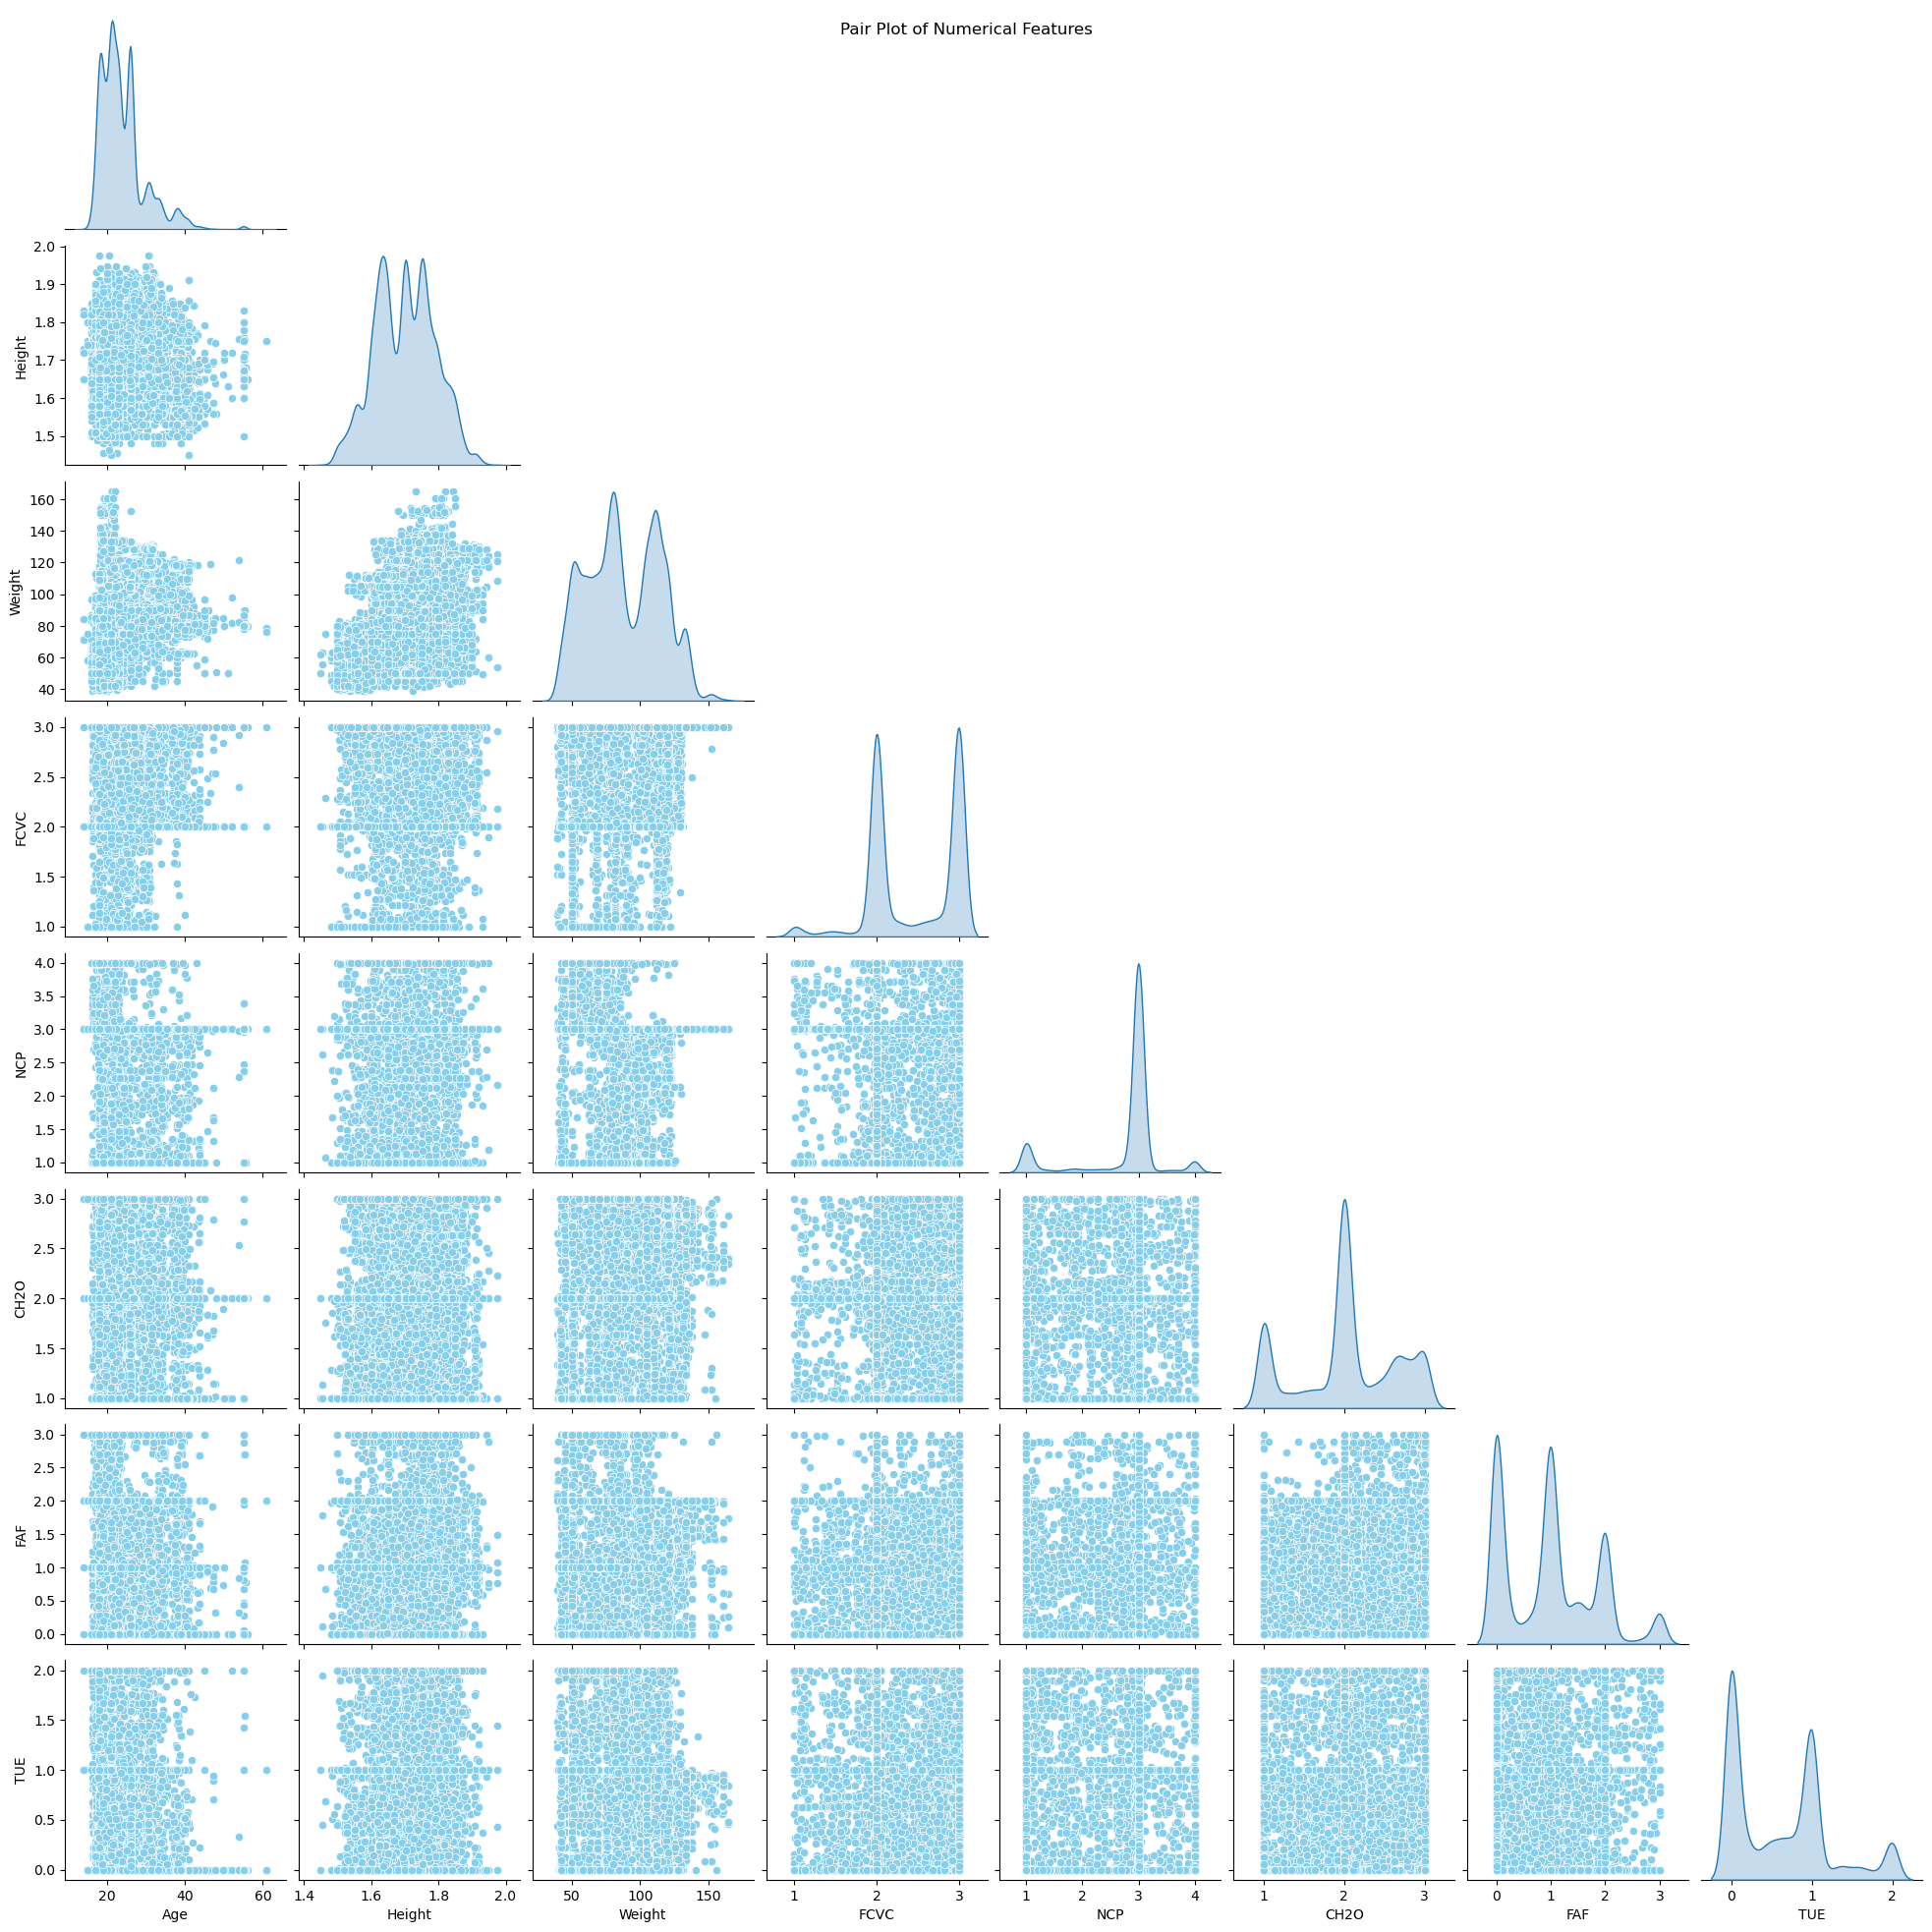

In [18]:
# Create a pair plot
sns.pairplot(df[numerical_features], diag_kind='kde', corner=True, plot_kws={'color': 'skyblue'})
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

##### Feature Engg : Adding Body Mass Index (BMI)

In [19]:
df['BMI'] = df.Weight/df.Height
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,48.041204
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,36.538462
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,29.311672
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,76.736160
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,49.001536
